In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Salary Data.csv')
df.head()

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525


In [4]:
df.tail()

,Experience Years,Salary
35,9.0,105582
36,9.5,116969
37,9.6,112635
38,10.3,122391
39,10.5,121872


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Experience Years  40 non-null     float64
 1   Salary            40 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 772.0 bytes


In [6]:
df.describe()

,Experience Years,Salary
count,40.000000,40.000000
mean,5.152500,74743.625000
std,2.663715,25947.122885
min,1.100000,37731.000000
25%,3.200000,56878.250000
50%,4.600000,64472.500000
75%,6.875000,95023.250000
max,10.500000,122391.000000


In [7]:
df.shape

(40, 2)

In [8]:
df.isnull().sum()

Experience Years    0
Salary              0
dtype: int64

In [14]:
x = df[['Experience Years']] 
y = df['Salary']

In [15]:
x.head()

,Experience Years
0,1.1
1,1.2
2,1.3
3,1.5
4,2.0


In [16]:
y.tail()

35    105582
36    116969
37    112635
38    122391
39    121872
Name: Salary, dtype: int64

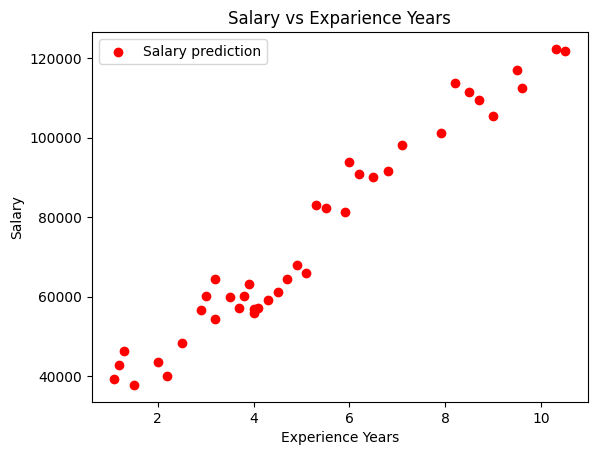

In [21]:
plt.scatter(df['Experience Years'], df['Salary'], marker='o', color='red', label='Salary prediction')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.title('Salary vs Exparience Years')
plt.legend()
plt.show()

# Linear Regression 

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(x,y)

LinearRegression()

In [25]:
m = reg.coef_
print(f"Slope (m):", m)

Slope (m): [9523.65050742]


In [26]:
c = reg.intercept_
print(f"intercept (c):", c) 

intercept (c): 25673.01576053028


In [29]:
y_pred = reg.predict(X)
print(y_pred)

[ 36149.03131869  37101.39636943  38053.76142017  39958.49152166
  44720.31677537  46625.04687685  49482.14202907  53291.60223204
  54243.96728278  56148.69738427  56148.69738427  59005.79253649
  60910.52263798  61862.88768872  62815.25273946  63767.6177902
  63767.6177902   64719.98284094  66624.71294243  68529.44304391
  70434.17314539  72338.90324688  74243.63334836  76148.36344984
  78053.09355133  81862.55375429  82814.91880504  84719.64890652
  87576.74405875  90433.83921097  93290.9343632  100909.85476913
 103766.94992136 106624.04507358 108528.77517506 111385.87032729
 116147.695581   117100.06063174 123766.61598693 125671.34608842]


In [31]:
df['Predicted Salary'] = reg.predict(X)   # Predict prices using the regression model
df.head()

,Experience Years,Salary,Predicted Salary
0,1.1,39343,36149.031319
1,1.2,42774,37101.396369
2,1.3,46205,38053.761420
3,1.5,37731,39958.491522
4,2.0,43525,44720.316775


In [32]:
reg.predict([[2.5]])

array([49482.14202907])

# Compute the residuals for each data point.

In [35]:
df['Residuals'] = df['Salary'] - df['Predicted Salary'] 
df

,Experience Years,Salary,Predicted Salary,Residuals
0,1.1,39343,36149.031319,3193.968681
1,1.2,42774,37101.396369,5672.603631
2,1.3,46205,38053.761420,8151.238580
3,1.5,37731,39958.491522,-2227.491522
4,2.0,43525,44720.316775,-1195.316775
5,2.2,39891,46625.046877,-6734.046877
6,2.5,48266,49482.142029,-1216.142029
7,2.9,56642,53291.602232,3350.397768
8,3.0,60150,54243.967283,5906.032717
9,3.2,54445,56148.697384,-1703.697384


#  Calculate MSE and MAE.

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predict_salary = reg.predict(X)

mse = mean_squared_error(y, predict_salary) 
mae = mean_absolute_error(y, predict_salary)  

print(f"MSE : {mse}")
print(f"MAE : {mae}")

MSE : 28960383.65377621
MAE : 4516.281792544623
